/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


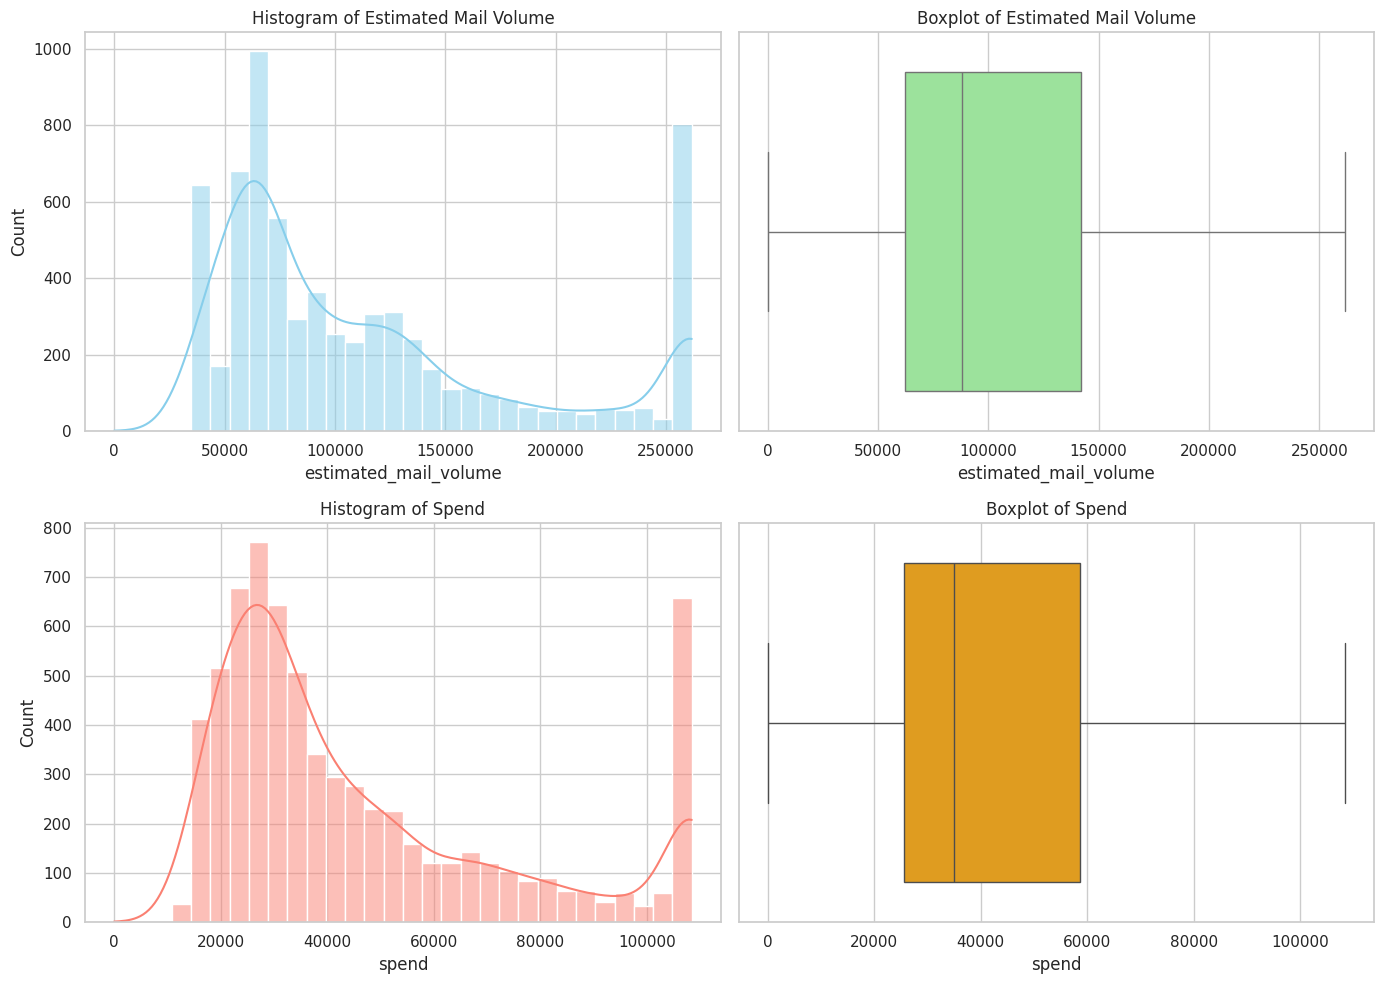

                                      
 1) Final Cleaned Data Shape: (6847, 11)
 2) Unique Banks: 9
 3) Month Range: 2022-05-01 00:00:00 to 2025-04-01 00:00:00
 4) Missing Value Table:
          column_name  missing_before missing_before_pct  missing_after missing_after_pct
                   id               0              0.00%              0             0.00%
         company_name               0              0.00%              0             0.00%
              product               0              0.00%              0             0.00%
      rewards_program               0              0.00%              0             0.00%
                month               0              0.00%              0             0.00%
              quarter               0              0.00%              0             0.00%
                 year               0              0.00%              0             0.00%
             category               0              0.00%              0             0.00%
     

In [26]:
#CLEANING & STRUCTURING PROCESS >>>>>>>>>>>>>>

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "/content/sample_data/DM US Financial Institutions Dataset.xlsx"
df = pd.read_excel(file_path, sheet_name="DMFinancialInstitutionsData")

# Data Cleaning -------------------------

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Strip whitespace from object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Remove Duplicates -------------------------

df = df.drop_duplicates()

# Standardize Bank Names -------------------------

bank_name_map = {
    "BOA": "Bank of America",
    "BofA": "Bank of America",
    "Bank Of America": "Bank of America",
    "Amex": "American Express",
    "American Express Bank": "American Express",
    "Citi": "Citibank",
    "Chase Bank": "Chase",
    "JP Morgan Chase": "Chase"
}
df["company_name"] = df["company_name"].replace(bank_name_map)

# Format Date Columns -------------------------

# Convert 'month' to datetime
df["month"] = pd.to_datetime(df["month"], errors="coerce")

# Ensure 'year' is numeric
df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

# Standardize 'quarter' format
df["quarter"] = df["quarter"].astype(str).str.strip()
df["quarter"] = df["quarter"].str.replace(r"(\d{4})\s*[Qq](\d)", r"\1 Q\2", regex=True)


# Handle Missing Values -------------------------

# Clean column names
df_raw.columns = df_raw.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 1: Missing Summary BEFORE Cleaning ===
missing_before = df_raw.isnull().sum().reset_index()
missing_before.columns = ["column_name", "missing_before"]
missing_before["missing_before_pct"] = (missing_before["missing_before"] / len(df_raw)) * 100

# Step 2: Clean the data ===
df_clean = df_raw.copy()

# Drop rows with missing essential values
df_clean = df_clean.dropna(subset=["company_name", "product", "month", "estimated_mail_volume", "spend"])

# Fill optional fields
if "rewards_program" in df_clean.columns:
    df_clean["rewards_program"] = df_clean["rewards_program"].fillna("Unknown")

# Step 3: Missing Summary AFTER Cleaning ===
missing_after = df_clean.isnull().sum().reset_index()
missing_after.columns = ["column_name", "missing_after"]
missing_after["missing_after_pct"] = (missing_after["missing_after"] / len(df_clean)) * 100

# Step 4: Merge & Format Table ===
missing_summary = pd.merge(missing_before, missing_after, on="column_name")
missing_summary = missing_summary.sort_values(by="missing_before", ascending=False)

# Format percentages for display
missing_summary["missing_before_pct"] = missing_summary["missing_before_pct"].map("{:.2f}%".format)
missing_summary["missing_after_pct"] = missing_summary["missing_after_pct"].map("{:.2f}%".format)


# Handle Outliers (IQR Method) -------------------------

numeric_cols = ["estimated_mail_volume", "spend"]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Strip whitespace from object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Standardize and clean numeric columns (just for plotting)
df = df.dropna(subset=["estimated_mail_volume", "spend"])
df["estimated_mail_volume"] = pd.to_numeric(df["estimated_mail_volume"], errors="coerce")
df["spend"] = pd.to_numeric(df["spend"], errors="coerce")

# Plot histograms and boxplots to visualize outliers
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram and Boxplot for Estimated Mail Volume
sns.histplot(df["estimated_mail_volume"], bins=30, ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title("Histogram of Estimated Mail Volume")

sns.boxplot(x=df["estimated_mail_volume"], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Boxplot of Estimated Mail Volume")

# Histogram and Boxplot for Spend
sns.histplot(df["spend"], bins=30, ax=axes[1, 0], kde=True, color='salmon')
axes[1, 0].set_title("Histogram of Spend")

sns.boxplot(x=df["spend"], ax=axes[1, 1], color='orange')
axes[1, 1].set_title("Boxplot of Spend")

plt.tight_layout()
plt.show()

# Summary Output -------------------------
print ("                                      ")
print(" 1) Final Cleaned Data Shape:", df.shape)
print(" 2) Unique Banks:", df['company_name'].nunique())
print(" 3) Month Range:", df['month'].min(), "to", df['month'].max())
print(" 4) Missing Value Table:")
print(missing_summary.to_string(index=False))

# Save to Excel -------------------------

output_path = "/content/cleaned_DM US Financial Institutions Dataset.xlsx"
df.to_excel(output_path, index=False)
print("📁 File saved to:", output_path)

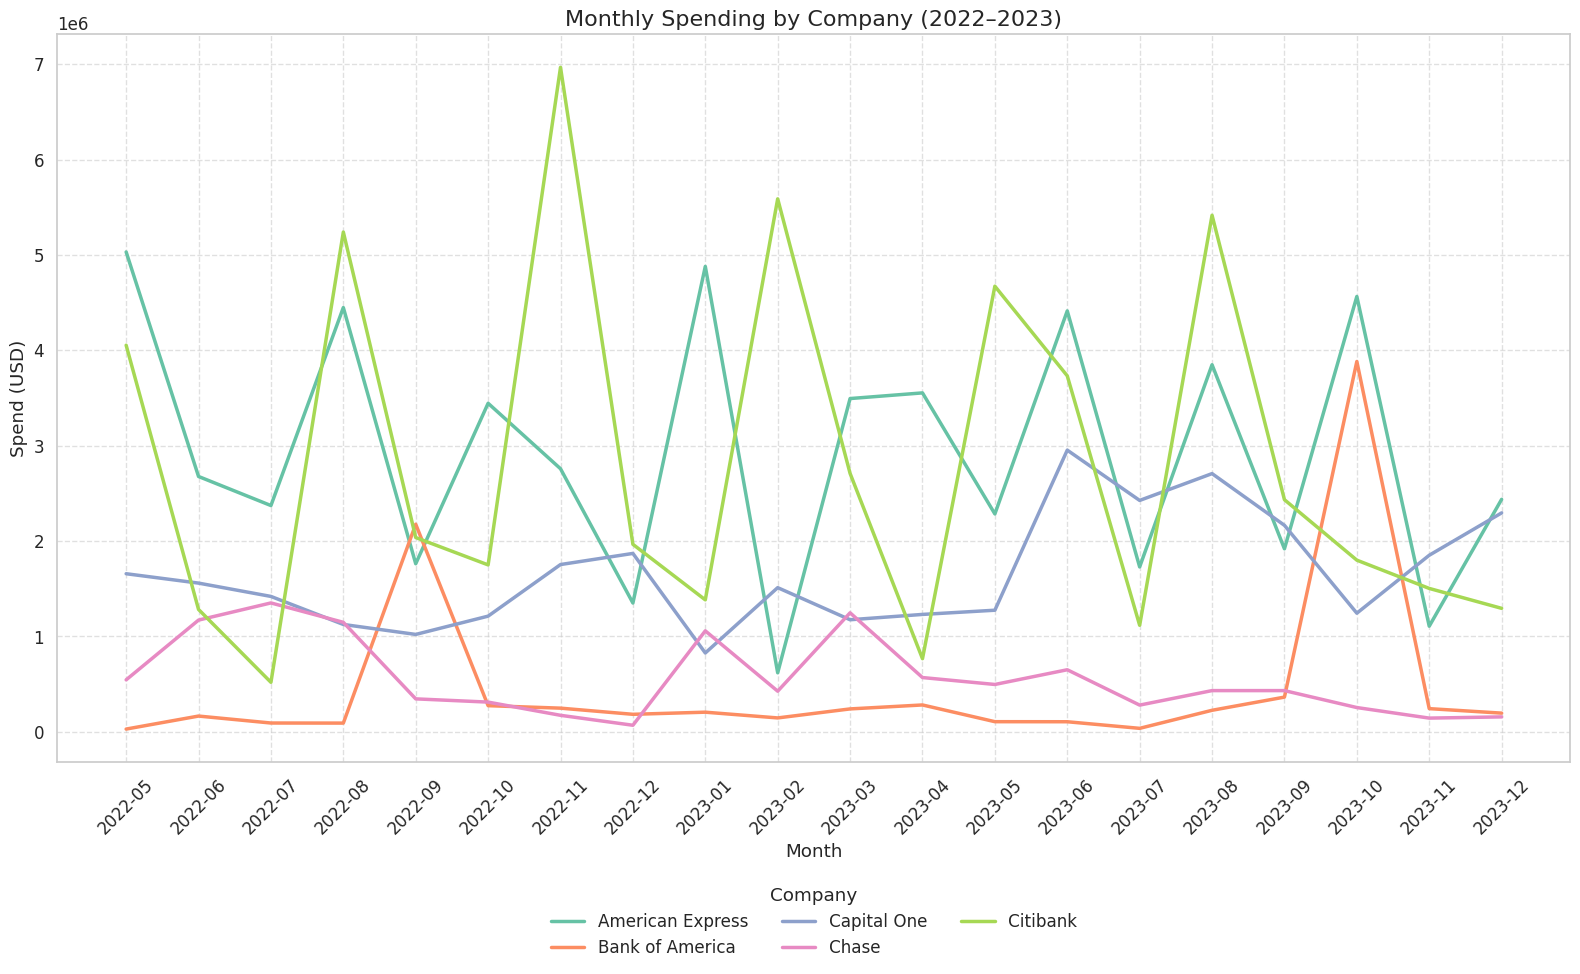

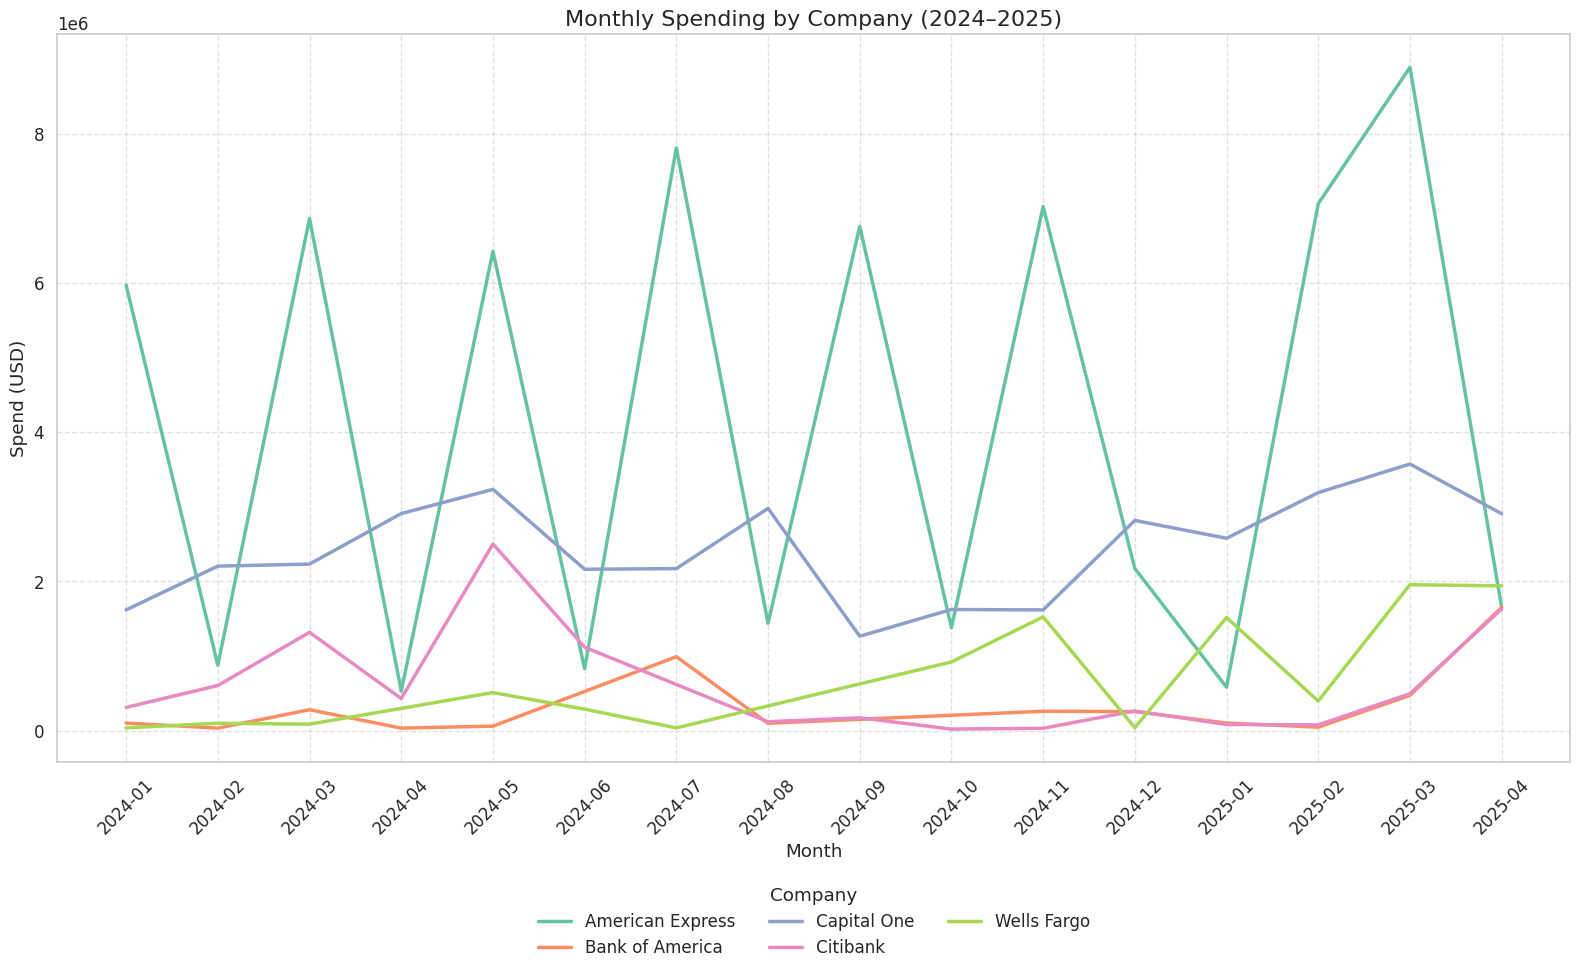

<ipython-input-47-e4b2c0aad0c6>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_spend, x='spend', y='company_name', palette='viridis')


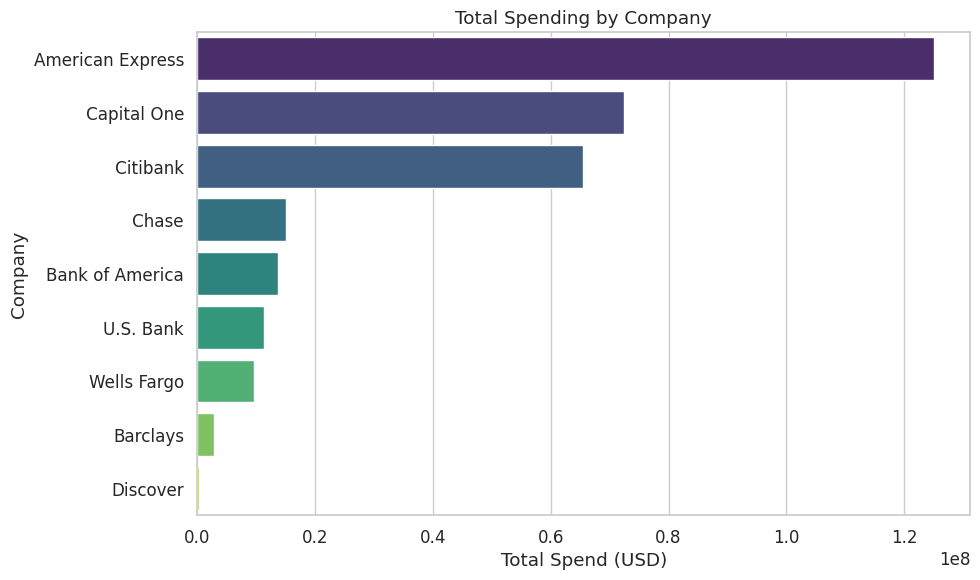

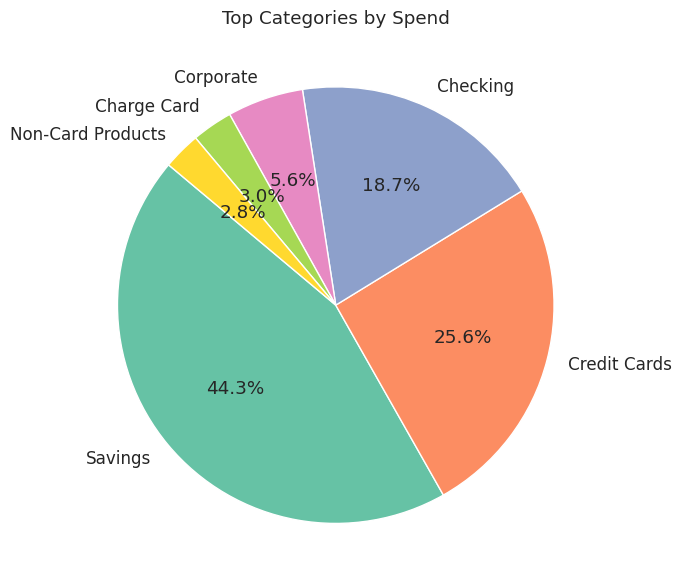

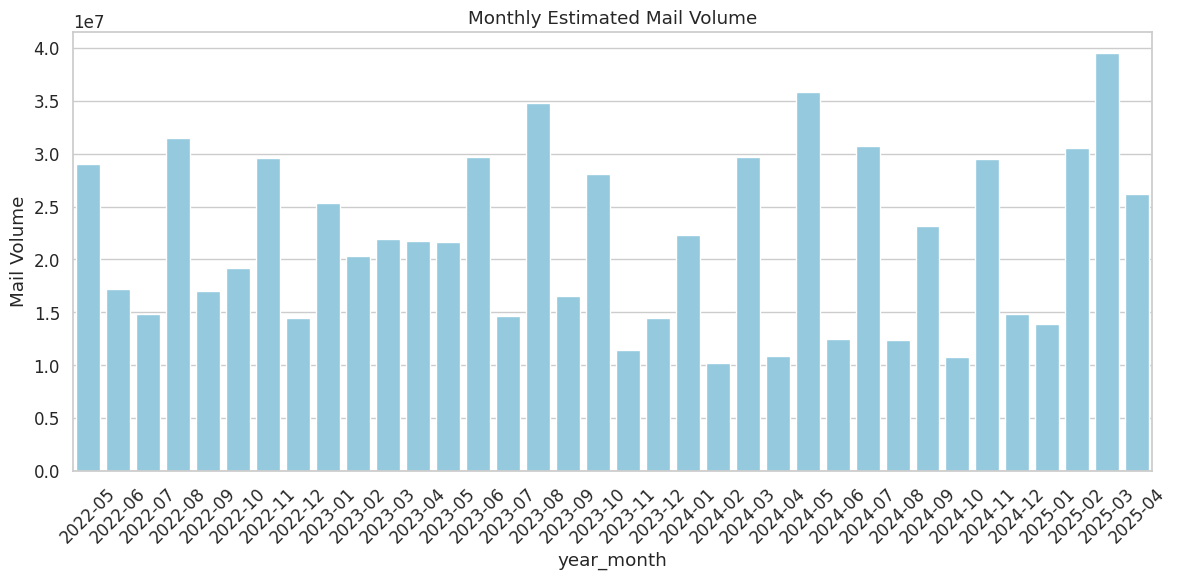

<ipython-input-47-e4b2c0aad0c6>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=company_volume, x='estimated_mail_volume', y='company_name', palette='coolwarm')


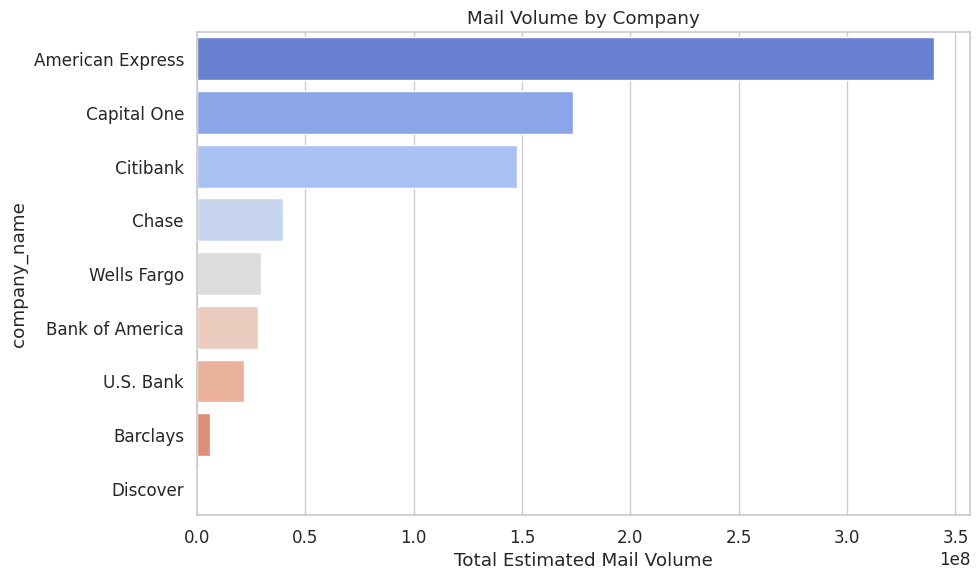

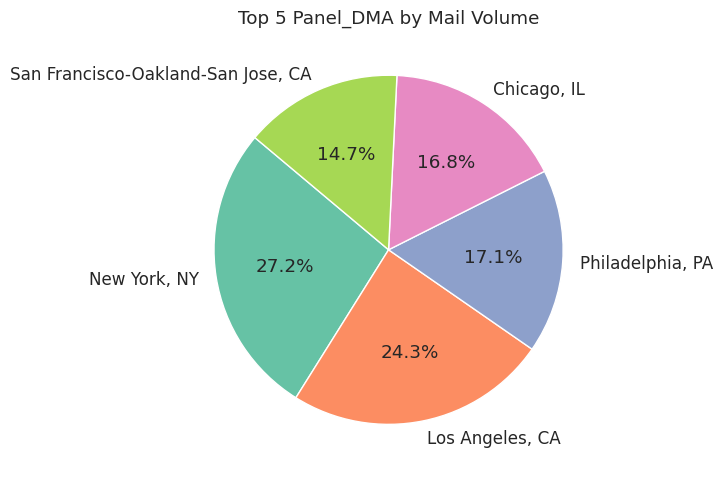

✅ Excel file saved to: /content/Comparative_Statistics_Export.xlsx


In [47]:
#TREND ANALYSIS >>>>>>>>>>>>>>

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Format USD
def format_usd(x):
    try:
        return f"${x:,.0f}"
    except:
        return x

# Load Excel
file_path = '/content/cleaned_DM US Financial Institutions Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Clean columns
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Parse dates
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['month'].dt.year
df['year_month'] = df['month'].dt.to_period('M').astype(str)

# 4.4.1 SPENDING TRENDS – LINE CHARTS
# Parse dates and extract year/month
df['month'] = pd.to_datetime(df['month'])
df['year_month'] = df['month'].dt.to_period('M').astype(str)
df['year'] = df['month'].dt.year

# Function to plot monthly spending by year range
def plot_monthly_spending(start_year, end_year):
    mask = (df['year'] >= start_year) & (df['year'] <= end_year)
    filtered_df = df[mask]

    monthly_spending = (
        filtered_df.groupby(['year_month', 'company_name'])['spend']
        .sum()
        .reset_index()
    )

    top_companies = (
        filtered_df.groupby('company_name')['spend']
        .sum()
        .nlargest(5)
        .index
    )
    monthly_spending = monthly_spending[monthly_spending['company_name'].isin(top_companies)]

    plt.figure(figsize=(16, 10))
    sns.lineplot(
        data=monthly_spending,
        x='year_month',
        y='spend',
        hue='company_name',
        linewidth=2.5
    )
    plt.title(f'Monthly Spending by Company ({start_year}–{end_year})', fontsize=16)
    plt.xlabel('Month')
    plt.ylabel('Spend (USD)')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Move legend to bottom center
    plt.legend(
        title='Company',
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=3,
        frameon=False
    )
    plt.tight_layout()
    plt.show()

# 🔹 Plot 2022–2023
plot_monthly_spending(2022, 2023)

# 🔹 Plot 2024–2025
plot_monthly_spending(2024, 2025)

# Bar chart: Total spend by company
plt.figure(figsize=(10, 6))
company_spend = df.groupby('company_name')['spend'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=company_spend, x='spend', y='company_name', palette='viridis')
plt.title('Total Spending by Company')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

# Pie chart: Top Category Spend
category_spend = df.groupby('category')['spend'].sum().sort_values(ascending=False)
top_categories = category_spend.head(6)
plt.figure(figsize=(7, 7))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Categories by Spend')
plt.tight_layout()
plt.show()

# 4.4.2 MAIL VOLUME TRENDS
monthly_volume = df.groupby('year_month')['estimated_mail_volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_volume, x='year_month', y='estimated_mail_volume', color='skyblue')
plt.title('Monthly Estimated Mail Volume')
plt.xticks(rotation=45)
plt.ylabel('Mail Volume')
plt.tight_layout()
plt.show()

# Mail volume by company
company_volume = df.groupby('company_name')['estimated_mail_volume'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=company_volume, x='estimated_mail_volume', y='company_name', palette='coolwarm')
plt.title('Mail Volume by Company')
plt.xlabel('Total Estimated Mail Volume')
plt.tight_layout()
plt.show()

# Pie chart: Top 5 Panel_DMA
dma_volume = df.groupby('panel_dma')['estimated_mail_volume'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(7, 7))
plt.pie(dma_volume, labels=dma_volume.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Panel_DMA by Mail Volume')
plt.tight_layout()
plt.show()

# 4.4.3 COMPARATIVE STATISTICS

import pandas as pd

# OPTIONAL: Install xlsxwriter if running in Colab or new environment
# !pip install xlsxwriter

# ---------- Load and Prepare Data ----------
def format_usd(x):
    try:
        return f"${x:,.0f}"
    except:
        return x

!pip install xlsxwriter

# Load your dataset
file_path = '/content/cleaned_DM US Financial Institutions Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Clean column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Parse date and extract year/month
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['month'].dt.year
df['year_month'] = df['month'].dt.to_period('M')

# ---------- 4.4.3 COMPARATIVE STATISTICS ----------

# 1. Top Reward Programs
top_rewards = df.groupby('rewards_program')['spend'].sum().sort_values(ascending=False).reset_index()
top_rewards.columns = ['Reward Program', 'Total Spend']
top_rewards['Total Spend'] = top_rewards['Total Spend'].apply(format_usd)

# 2. Total Spend by Year per Bank
total_by_year = df.groupby(['year', 'company_name'])['spend'].sum().reset_index()
pivot_year = total_by_year.pivot(index='company_name', columns='year', values='spend').fillna(0).astype(int)
pivot_year_usd = pivot_year.apply(lambda col: col.map(format_usd))
pivot_year_usd.index.name = 'Bank Name'

# 3. Top 3 Spenders by Year
top3_by_year = total_by_year.sort_values(['year', 'spend'], ascending=[True, False]).groupby('year').head(3)
top3_by_year['spend'] = top3_by_year['spend'].apply(format_usd)
top3_by_year.columns = ['Year', 'Bank Name', 'Total Spend']

# 4. 2023 MoM Growth Summary
monthly_bank_spend = df.groupby(['year_month', 'company_name'])['spend'].sum().unstack().fillna(0)
mom_growth = monthly_bank_spend.pct_change().fillna(0) * 100

total_2023 = df[df['year'] == 2023].groupby('company_name')['spend'].sum()
growth_2023 = mom_growth[mom_growth.index.year == 2023].mean().round(1)

summary = pd.DataFrame({
    'Total Spend (2023)': total_2023,
    'MoM Growth (%)': growth_2023
}).dropna().sort_values(by='Total Spend (2023)', ascending=False)

summary['Total Spend (2023)'] = summary['Total Spend (2023)'].apply(format_usd)
summary['MoM Growth (%)'] = summary['MoM Growth (%)'].apply(lambda x: f"{x:+.1f}%")
summary.index.name = 'Bank Name'

# ---------- Export to Excel ----------
output_path = '/content/Comparative_Statistics_Export.xlsx'
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    top_rewards.to_excel(writer, sheet_name='Top Reward Programs', index=False)
    pivot_year_usd.to_excel(writer, sheet_name='Total Spend per Bank')
    top3_by_year.to_excel(writer, sheet_name='Top 3 Spenders by Year', index=False)
    summary.to_excel(writer, sheet_name='2023 MoM Growth Summary')

print(f"✅ Excel file saved to: {output_path}")